<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/8th%20Week%20Tasks/SVM%20Dengan%20Dataset%20Lainnya/SVM%20Possum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi menggunakan SVM dengan dataset Possum**

Nama: Gilman Muslih Z

NIM: 1103201075

In [ ]:
from google.colab import drive
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Menghubungkan Colab dengan Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Membuka dataset yang akan digunakan
file_path = '/content/gdrive/MyDrive/Dataset/possum (1).csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
# Mengisi nilai null dalam kolom 'age' dan 'footlgth' dengan nilai rata-rata
df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())

# Menampilkan jumlah nilai null setelah pengisian
print("Jumlah nilai null setelah pengisian:")
print(df[['age', 'footlgth']].isnull().sum())

Jumlah nilai null setelah pengisian:
age         0
footlgth    0
dtype: int64


In [ ]:
# Mengecek kembali jumlah nilai null dalam setiap kolom dataset
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
# Menghapus baris yang memiliki nilai NaN
df.dropna(inplace=True)

In [ ]:
# Menentukan variabel target dan variabel fitur
X = df.drop(['case', 'Pop'], axis=1)
y = df['Pop']

In [ ]:
# Menggunakan LabelEncoder untuk mengonversi data kategorikal menjadi numerik
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])

# Menggunakan OneHotEncoder untuk variabel kategorikal 'sex'
onehot_encoder = OneHotEncoder(sparse=False)
sex_encoded = onehot_encoder.fit_transform(X[['sex']])
X[['f', 'm']] = pd.DataFrame(sex_encoded, columns=['f', 'm'])
X.drop(['sex'], axis=1, inplace=True)

# Menentukan variabel target
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Membuat model SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Melakukan prediksi
predictions = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [ ]:
# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Model SVM yang telah dilatih pada dataset ini memberikan hasil evaluasi yang sangat baik. Akurasi, presisi, recall, dan F1-score semua mencapai nilai maksimum (1.0), menunjukkan bahwa model dapat membedakan dengan sempurna antara kedua kelas dalam dataset. Matriks konfusi menunjukkan bahwa tidak ada kesalahan prediksi, dan model dapat mengidentifikasi seluruh sampel positif dan negatif dengan benar.

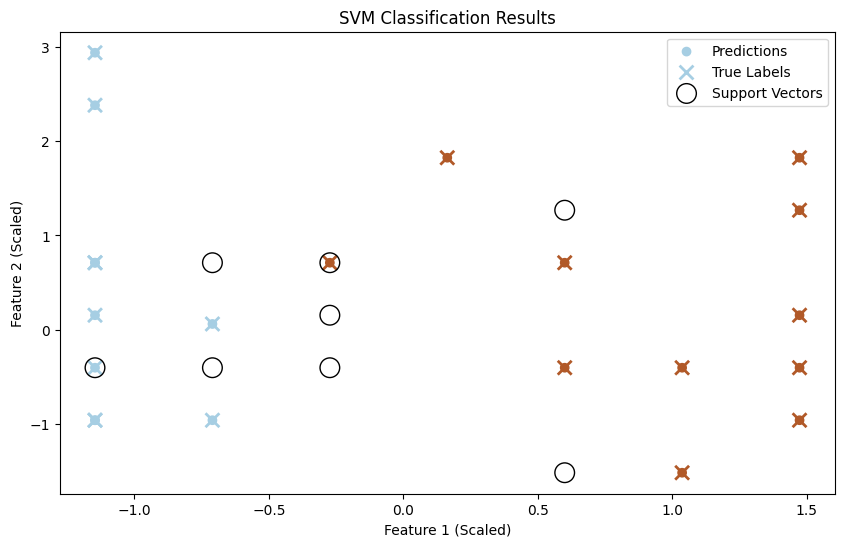

In [ ]:
# Misalnya kita hanya menggunakan dua fitur untuk keperluan visualisasi
X_test_2d = X_test_scaled[:, :2]

# Membuat scatter plot untuk data uji
plt.figure(figsize=(10, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=predictions, cmap=plt.cm.Paired, marker='o', label='Predictions')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=100, linewidths=2, label='True Labels')

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title('SVM Classification Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()